### DEPENDENCY

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

## 1. Convert JSON to CSV for games.json => steam 1

In [2]:
json_path = "data/games.json"

In [3]:
df = pd.read_json(json_path)
df = df.T
df.head()

,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,header_image,...,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,discount
20200,Galactic Bowling,"Oct 21, 2008",0,19.99,0,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,,https://cdn.akamai.steamstatic.com/steam/apps/...,...,6,11,0 - 20000,0,0,0,0,0,"{'Indie': 22, 'Casual': 21, 'Sports': 21, 'Bow...",NaN
655370,Train Bandit,"Oct 12, 2017",0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,,https://cdn.akamai.steamstatic.com/steam/apps/...,...,53,5,0 - 20000,0,0,0,0,0,"{'Indie': 109, 'Action': 103, 'Pixel Graphics'...",NaN
1732930,Jolt Project,"Nov 17, 2021",0,4.99,0,Jolt Project: The army now has a new robotics ...,Jolt Project: The army now has a new robotics ...,"Shoot vehicles, blow enemies with a special at...",,https://cdn.akamai.steamstatic.com/steam/apps/...,...,0,0,0 - 20000,0,0,0,0,0,[],NaN
1355720,Henosis™,"Jul 23, 2020",0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,,https://cdn.akamai.steamstatic.com/steam/apps/...,...,3,0,0 - 20000,0,0,0,0,0,"{'2D Platformer': 161, 'Atmospheric': 154, 'Su...",NaN
1139950,Two Weeks in Painland,"Feb 3, 2020",0,0.0,0,ABOUT THE GAME Play as a hacker who has arrang...,ABOUT THE GAME Play as a hacker who has arrang...,Two Weeks in Painland is a story-driven game a...,,https://cdn.akamai.steamstatic.com/steam/apps/...,...,50,8,0 - 20000,0,0,0,0,0,"{'Indie': 42, 'Adventure': 41, 'Nudity': 22, '...",NaN


app_id read as index, let's fix the column name

In [4]:
column_name_dict = {
"name": "Name",
"release_date": "Release date",
"required_age": "Required age",
"price": "Price",
"dlc_count": "DLC count",
"detailed_description": "Detailed description",
"about_the_game": "About the game",
"short_description": "Short description",
"reviews": "Reviews",
"header_image": "Header image",
"website": "Website",
"support_url": "Support url",
"support_email": "Support email",
"windows": "Windows",
"mac": "Mac",
"linux": "Linux",
"metacritic_score": "Metacritic score",
"metacritic_url": "Metacritic url",
"achievements": "Achievements",
"recommendations": "Recommendations",
"notes": "Notes",
"supported_languages": "Supported languages",
"full_audio_languages": "Full audio languages",
"packages": "Packages",
"developers": "Developers",
"publishers": "Publishers",
"categories": "Categories",
"genres": "Genres",
"screenshots": "Screenshots",
"movies": "Movies",
"user_score": "User score",
"score_rank": "Score rank",
"positive": "Positive",
"negative": "Negative",
"estimated_owners": "Estimated owners",
"average_playtime_forever": "Average playtime forever",
"average_playtime_2weeks": "Average playtime two weeks",
"median_playtime_forever": "Median playtime forever",
"median_playtime_2weeks": "Median playtime two weeks",
"peak_ccu": "Peak CCU",
"tags": "Tags"
}

In [10]:
def convert_dict_to_string(dict_object):
    if len(dict_object) == 0:
        return np.NaN
    key_list = list(dict_object.keys())
    keys_string = ",".join(key_list)
    return keys_string

def read_convert_json_dataset():
    _df = pd.read_json(json_path)
    _df = _df.T
    _df['app_id'] = _df.index
    _df.rename(columns=column_name_dict, inplace=True)

    for col in _df.columns.values:
        if isinstance(_df.loc[546560][col], dict):
            _df[col] = _df[col].apply(lambda entries: convert_dict_to_string(entries))
        if isinstance(_df.loc[546560][col], list):
            if isinstance(_df.loc[546560][col][0], str):
                _df[col] = _df[col].apply(lambda entries: ",".join(entries))
    _df = _df.reset_index().set_index("app_id")
    return _df

df = read_convert_json_dataset()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111452 entries, 20200 to 3183790
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   index                       111452 non-null  int64 
 1   Name                        111452 non-null  object
 2   Release date                111452 non-null  object
 3   Required age                111452 non-null  object
 4   Price                       111452 non-null  object
 5   DLC count                   111452 non-null  object
 6   Detailed description        111452 non-null  object
 7   About the game              111452 non-null  object
 8   Short description           111452 non-null  object
 9   Reviews                     111452 non-null  object
 10  Header image                111452 non-null  object
 11  Website                     111452 non-null  object
 12  Support url                 111452 non-null  object
 13  Support email           

In [12]:
df.head()

,index,Name,Release date,Required age,Price,DLC count,Detailed description,About the game,Short description,Reviews,...,Positive,Negative,Estimated owners,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Peak CCU,Tags,discount
app_id,,,,,,,,,,,,,,,,,,,,,
20200,20200,Galactic Bowling,"Oct 21, 2008",0,19.99,0,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,,...,6,11,0 - 20000,0,0,0,0,0,"Indie,Casual,Sports,Bowling",NaN
655370,655370,Train Bandit,"Oct 12, 2017",0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,,...,53,5,0 - 20000,0,0,0,0,0,"Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",NaN
1732930,1732930,Jolt Project,"Nov 17, 2021",0,4.99,0,Jolt Project: The army now has a new robotics ...,Jolt Project: The army now has a new robotics ...,"Shoot vehicles, blow enemies with a special at...",,...,0,0,0 - 20000,0,0,0,0,0,NaN,NaN
1355720,1355720,Henosis™,"Jul 23, 2020",0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,,...,3,0,0 - 20000,0,0,0,0,0,"2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",NaN
1139950,1139950,Two Weeks in Painland,"Feb 3, 2020",0,0.0,0,ABOUT THE GAME Play as a hacker who has arrang...,ABOUT THE GAME Play as a hacker who has arrang...,Two Weeks in Painland is a story-driven game a...,,...,50,8,0 - 20000,0,0,0,0,0,"Indie,Adventure,Nudity,Violent,Sexual Content,...",NaN


In [14]:
df.drop(columns=['index'], inplace=True)

In [15]:
df.to_csv("data/converted_big.csv") # Saving the converted dataframe
converted = pd.read_csv("data/converted_big.csv") # Reading it back
converted.head()

,app_id,Name,Release date,Required age,Price,DLC count,Detailed description,About the game,Short description,Reviews,...,Positive,Negative,Estimated owners,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Peak CCU,Tags,discount
0,20200,Galactic Bowling,"Oct 21, 2008",0,19.99,0,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,NaN,...,6,11,0 - 20000,0,0,0,0,0,"Indie,Casual,Sports,Bowling",NaN
1,655370,Train Bandit,"Oct 12, 2017",0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,NaN,...,53,5,0 - 20000,0,0,0,0,0,"Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",NaN
2,1732930,Jolt Project,"Nov 17, 2021",0,4.99,0,Jolt Project: The army now has a new robotics ...,Jolt Project: The army now has a new robotics ...,"Shoot vehicles, blow enemies with a special at...",NaN,...,0,0,0 - 20000,0,0,0,0,0,NaN,NaN
3,1355720,Henosis™,"Jul 23, 2020",0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,NaN,...,3,0,0 - 20000,0,0,0,0,0,"2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",NaN
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,ABOUT THE GAME Play as a hacker who has arrang...,Two Weeks in Painland is a story-driven game a...,NaN,...,50,8,0 - 20000,0,0,0,0,0,"Indie,Adventure,Nudity,Violent,Sexual Content,...",NaN


## 2a. EDA Steam1

### READ DATA

In [16]:
# read converted big
df = pd.read_csv("data/converted_big.csv")
df.head(2)

,app_id,Name,Release date,Required age,Price,DLC count,Detailed description,About the game,Short description,Reviews,...,Positive,Negative,Estimated owners,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Peak CCU,Tags,discount
0,20200,Galactic Bowling,"Oct 21, 2008",0,19.99,0,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,NaN,...,6,11,0 - 20000,0,0,0,0,0,"Indie,Casual,Sports,Bowling",NaN
1,655370,Train Bandit,"Oct 12, 2017",0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,NaN,...,53,5,0 - 20000,0,0,0,0,0,"Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",NaN


### BASIC INFO

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111452 entries, 0 to 111451
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   app_id                      111452 non-null  int64  
 1   Name                        111446 non-null  object 
 2   Release date                111452 non-null  object 
 3   Required age                111452 non-null  int64  
 4   Price                       111452 non-null  float64
 5   DLC count                   111452 non-null  int64  
 6   Detailed description        104995 non-null  object 
 7   About the game              104969 non-null  object 
 8   Short description           105076 non-null  object 
 9   Reviews                     10624 non-null   object 
 10  Header image                111452 non-null  object 
 11  Website                     46458 non-null   object 
 12  Support url                 50769 non-null   object 
 13  Support email 

In [18]:
df.columns

Index(['app_id', 'Name', 'Release date', 'Required age', 'Price', 'DLC count',
       'Detailed description', 'About the game', 'Short description',
       'Reviews', 'Header image', 'Website', 'Support url', 'Support email',
       'Windows', 'Mac', 'Linux', 'Metacritic score', 'Metacritic url',
       'Achievements', 'Recommendations', 'Notes', 'Supported languages',
       'Full audio languages', 'Packages', 'Developers', 'Publishers',
       'Categories', 'Genres', 'Screenshots', 'Movies', 'User score',
       'Score rank', 'Positive', 'Negative', 'Estimated owners',
       'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Peak CCU',
       'Tags', 'discount'],
      dtype='object')

In [19]:
df.shape

(111452, 43)

### MISSING VALUE IDENTIFICATION

In [21]:
# Get missing value amount and percentage for each column and sort Descending
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values = pd.DataFrame(missing_values)
missing_values.columns = ['Missing Values']
missing_values['Percentage'] = (missing_values['Missing Values'] / df.shape[0]) * 100
missing_values = missing_values.sort_values(by='Missing Values', ascending=False)
missing_values

,Missing Values,Percentage
Score rank,111408,99.960521
Metacritic url,107447,96.406525
Reviews,100828,90.467645
discount,97410,87.400854
Notes,93002,83.445788
Full audio languages,65823,59.059505
Website,64994,58.315687
Support url,60683,54.447655
Tags,37423,33.577684
Support email,19022,17.067437


- Beberapa game di steam ada yang dibuat untuk testing jadi bisa aja gapunya score rank
- No metacritic url bisa jadi karena emang ga diprovide linknya, tapi metacritic scorenya ada semua kok dan ini yang lebih penting
- No review bisa jadi karena gamenya untuk testing atau datanya rusak ketika diambil dari source
- discount: game dijual tanpa diskon, make sense aja apalagi kalo gamenya juga yang gratisan, ini diliar dlu lagi aja, drop belakangan soalnya bisa dipake buat cari insight diskon-price-estimated owners
- Notes: gaada notes tambahan terkait gamenya, normal aja
- Full audio langauges: game tanpa dialog, normal aja
- Website: gamenya dirilis lgsg ke steam tanpa link webnya, normal aja
- Support url: gaada url utk help/customer support dari gamenya
- Tags: tag dikasih sama user ke game, kalo gamenya baru rilis atau sepi/gaada pemain ya gaada tagnya
- Movies: game dirilis tanpa ada film, bisa aja berguna karena kadang ada yang download/tau game dari filmnya gitu
- Support email: yaudah gaada, jarang pengaruh jg rasanya
- Kategori: game tanpa kategori, ini bikin susah sih mungkin akan didrop row yg kategorinya kosong
- Publishers: ini dapat berpengaruh
- About the game: gaada deskripsi, gpp sih
- Developers: ini juga bisa pengaruh ke gamenya
- Detail desc: ya gt
- Genres: penting sih, bakalan di drop row yang null genrenya
- Supported languages: bisa berpengaruh
- Short desc: ya gt
- Screenshots: berupa link url ss nya
- Name: game tanpa nama, gamungkin gasi?

In [22]:
# Explore some columns
df['Website']

0              http://www.galacticbowling.net
1                      http://trainbandit.com
2                                         NaN
3                    https://henosisgame.com/
4         https://www.unusual-games.com/home/
                         ...                 
111447                                    NaN
111448         https://www.hentaipanda.games/
111449                                    NaN
111450                   https://accubow.com/
111451               https://www.ledxfun.com/
Name: Website, Length: 111452, dtype: object

In [23]:
df['Header image']

0         https://cdn.akamai.steamstatic.com/steam/apps/...
1         https://cdn.akamai.steamstatic.com/steam/apps/...
2         https://cdn.akamai.steamstatic.com/steam/apps/...
3         https://cdn.akamai.steamstatic.com/steam/apps/...
4         https://cdn.akamai.steamstatic.com/steam/apps/...
                                ...                        
111447    https://shared.akamai.steamstatic.com/store_it...
111448    https://shared.akamai.steamstatic.com/store_it...
111449    https://shared.akamai.steamstatic.com/store_it...
111450    https://shared.akamai.steamstatic.com/store_it...
111451    https://shared.akamai.steamstatic.com/store_it...
Name: Header image, Length: 111452, dtype: object

In [24]:
# Drop column that is an image or url
df.drop(columns=['Header image', 'Website', 'Support url', 'Support email', 'Metacritic url'], inplace=True)

In [26]:
df.columns

Index(['app_id', 'Name', 'Release date', 'Required age', 'Price', 'DLC count',
       'Detailed description', 'About the game', 'Short description',
       'Reviews', 'Windows', 'Mac', 'Linux', 'Metacritic score',
       'Achievements', 'Recommendations', 'Notes', 'Supported languages',
       'Full audio languages', 'Packages', 'Developers', 'Publishers',
       'Categories', 'Genres', 'Screenshots', 'Movies', 'User score',
       'Score rank', 'Positive', 'Negative', 'Estimated owners',
       'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Peak CCU',
       'Tags', 'discount'],
      dtype='object')

I think its enough since we have other dataset that needs exploration

In [28]:
# put new dataframe into steam1 variable
steam1 = df.copy()

## 2b. EDA Steam 2

In [29]:
steam2 = pd.read_csv('data/games_small.csv')
steam2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  float64
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


Here we found other columns: rating, positive_ratio, user_reviews, price_original, price_final. Lets explore this new features

In [30]:
steam2.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


app_id, title, date_release, win, mac, linux, and discount is similar as before, so we can drop these columns for further analysis

### Check whether the same app_id between steam1 and steam2 refer to the same game

In [31]:
steam1[steam1['app_id'] == 13500]

,app_id,Name,Release date,Required age,Price,DLC count,Detailed description,About the game,Short description,Reviews,...,Positive,Negative,Estimated owners,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Peak CCU,Tags,discount
31285,13500,Prince of Persia: Warrior Within™,"Nov 21, 2008",17,9.99,0,Enter the dark underworld of Prince of Persia ...,Enter the dark underworld of Prince of Persia ...,Enter the dark underworld of Prince of Persia ...,NaN,...,1807,307,200000 - 500000,61,10,77,10,18,"Action,Adventure,Parkour,Third Person,Great So...",NaN


In [32]:
steam2[steam2['app_id'] == 13500]

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True


- We can conclude that steam1 and steam1 are intersecting, we can combine them using the app_id.
- The date_release in steam2 already in proper date format, we will use this column rather than the Release date in steam1
- Its better to use discount from the steam2 since its seems connected to the price_final and price_original
- We will remove Price from steam1 since it is not clear stating the final price or original price

In [33]:
# Drop release date, Price, and discount from steam1
steam1.drop(columns=['Release date', 'Price', 'discount'], inplace=True)
steam1.columns

Index(['app_id', 'Name', 'Required age', 'DLC count', 'Detailed description',
       'About the game', 'Short description', 'Reviews', 'Windows', 'Mac',
       'Linux', 'Metacritic score', 'Achievements', 'Recommendations', 'Notes',
       'Supported languages', 'Full audio languages', 'Packages', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Screenshots', 'Movies',
       'User score', 'Score rank', 'Positive', 'Negative', 'Estimated owners',
       'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Peak CCU',
       'Tags'],
      dtype='object')

In [34]:
# Drop title, win, mac, linux from steam2
steam2.drop(columns=['title', 'win', 'mac', 'linux'], inplace=True)
steam2.columns

Index(['app_id', 'date_release', 'rating', 'positive_ratio', 'user_reviews',
       'price_final', 'price_original', 'discount', 'steam_deck'],
      dtype='object')

## 3. MERGE steam1 and steam2

In [35]:
steam1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111452 entries, 0 to 111451
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   app_id                      111452 non-null  int64  
 1   Name                        111446 non-null  object 
 2   Required age                111452 non-null  int64  
 3   DLC count                   111452 non-null  int64  
 4   Detailed description        104995 non-null  object 
 5   About the game              104969 non-null  object 
 6   Short description           105076 non-null  object 
 7   Reviews                     10624 non-null   object 
 8   Windows                     111452 non-null  bool   
 9   Mac                         111452 non-null  bool   
 10  Linux                       111452 non-null  bool   
 11  Metacritic score            111452 non-null  int64  
 12  Achievements                111452 non-null  int64  
 13  Recommendation

In [36]:
steam2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   date_release    50872 non-null  object 
 2   rating          50872 non-null  object 
 3   positive_ratio  50872 non-null  int64  
 4   user_reviews    50872 non-null  int64  
 5   price_final     50872 non-null  float64
 6   price_original  50872 non-null  float64
 7   discount        50872 non-null  float64
 8   steam_deck      50872 non-null  bool   
dtypes: bool(1), float64(3), int64(3), object(2)
memory usage: 3.2+ MB


In [37]:
# Merge on app_id
merged_df = pd.merge(steam1, steam2, on='app_id', how='inner')
merged_df

,app_id,Name,Required age,DLC count,Detailed description,About the game,Short description,Reviews,Windows,Mac,...,Peak CCU,Tags,date_release,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,20200,Galactic Bowling,0,0,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,NaN,True,False,...,0,"Indie,Casual,Sports,Bowling",2008-10-21,Mostly Negative,33,12,19.99,19.99,0.0,True
1,655370,Train Bandit,0,0,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,NaN,True,True,...,0,"Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",2017-10-12,Very Positive,88,51,0.27,0.99,72.0,True
2,1139950,Two Weeks in Painland,0,0,ABOUT THE GAME Play as a hacker who has arrang...,ABOUT THE GAME Play as a hacker who has arrang...,Two Weeks in Painland is a story-driven game a...,NaN,True,True,...,0,"Indie,Adventure,Nudity,Violent,Sexual Content,...",2020-02-03,Very Positive,86,58,0.00,0.00,0.0,True
3,1469160,Wartune Reborn,0,0,Feel tired of auto-fight? Feel tired of boring...,Feel tired of auto-fight? Feel tired of boring...,'Wartune Reborn' epic magic TBS game was devel...,NaN,True,False,...,68,"Turn-Based Combat,Massively Multiplayer,Multip...",2021-02-26,Mixed,63,168,0.00,0.00,0.0,True
4,1659180,TD Worlds,0,1,"TD Worlds is a dynamic, highly strategical gam...","TD Worlds is a dynamic, highly strategical gam...","TD Worlds is a dynamic, highly strategical gam...",NaN,True,False,...,3,"Tower Defense,Rogue-lite,RTS,Replay Value,Perm...",2022-01-09,Mixed,65,23,10.99,10.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41165,1272080,PAYDAY 3,17,0,Step out of retirement back into the life of c...,Step out of retirement back into the life of c...,PAYDAY 3 is the much anticipated sequel to one...,NaN,True,False,...,3532,"Heist,Co-op,Action,Crime,FPS,Multiplayer,Shoot...",2023-09-21,Mostly Negative,38,29458,40.00,0.00,0.0,True
41166,2342950,God Of Weapons,0,0,⚔️CHECK THIS OUT!⚔️ / About the Game The world...,The world was once a bright and beautiful plac...,Embark on a thrilling journey in God of Weapon...,NaN,True,False,...,695,"Action Roguelike,RPG,Inventory Management,Rogu...",2023-09-12,Very Positive,84,1263,6.00,0.00,0.0,True
41167,1692240,Fortune's Run,0,1,"Discover the quiet dystopia of Fortune's Run, ...","Discover the quiet dystopia of Fortune's Run, ...",Explore a decaying industrial world left behin...,NaN,True,False,...,4,"Early Access,Cyberpunk,Immersive Sim,FPS,Steal...",2023-09-27,Very Positive,94,145,18.00,0.00,0.0,True
41168,1580180,Gunbrella,0,2,Gunbrella is a gritty noir-punk action-adventu...,Gunbrella is a gritty noir-punk action-adventu...,"Uncover the dark secrets of a gritty, tangled ...",“Gunbrella’s crunchy combat and excellent move...,True,False,...,19,"Side Scroller,Exploration,Platformer,Action Ro...",2023-09-13,Very Positive,88,248,15.00,0.00,0.0,True


In [38]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   app_id                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

In [42]:
# Rename columns so it in same name format
merged_df.rename(columns={
    'app_id': 'App ID',
    'date_release': 'Release date',
    'positive_ratio': 'Positive ratio',
    'price_final': 'Price final',
    'price_original': 'Price original',
    'discount': 'Discount',
    'steam_deck': 'Steam Deck',
}, inplace=True)

In [43]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App ID                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

In [45]:
# show 10 first row of sorted id merged_df
merged_df = merged_df.sort_values(by='App ID', ascending=True)
merged_df.head(10)

,App ID,Name,Required age,DLC count,Detailed description,About the game,Short description,Reviews,Windows,Mac,...,Peak CCU,Tags,Release date,rating,Positive ratio,user_reviews,Price final,Price original,Discount,Steam Deck
22902,10,Counter-Strike,0,0,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,NaN,True,True,...,13230,"Action,FPS,Multiplayer,Shooter,Classic,Team-Ba...",2000-11-01,Overwhelmingly Positive,97,136118,9.99,9.99,0.0,True
11359,20,Team Fortress Classic,0,0,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...,NaN,True,True,...,110,"Action,FPS,Multiplayer,Classic,Hero Shooter,Sh...",1999-04-01,Very Positive,85,5146,4.99,4.99,0.0,True
2120,30,Day of Defeat,0,0,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,NaN,True,True,...,106,"FPS,World War II,Multiplayer,Shooter,Action,Wa...",2003-05-01,Very Positive,87,3489,4.99,4.99,0.0,True
19935,40,Deathmatch Classic,0,0,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,NaN,True,True,...,2,"Action,FPS,Classic,Multiplayer,Shooter,First-P...",2001-06-01,Mostly Positive,79,1757,4.99,4.99,0.0,True
22696,50,Half-Life: Opposing Force,0,0,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,NaN,True,True,...,120,"FPS,Action,Classic,Sci-fi,Singleplayer,Shooter...",1999-11-01,Overwhelmingly Positive,95,14057,4.99,4.99,0.0,True
20171,60,Ricochet,0,0,A futuristic action game that challenges your ...,A futuristic action game that challenges your ...,A futuristic action game that challenges your ...,NaN,True,True,...,10,"Action,FPS,Multiplayer,Classic,First-Person,Sc...",2000-11-01,Very Positive,80,3395,4.99,4.99,0.0,True
28761,70,Half-Life,0,1,Named Game of the Year by over 50 publications...,Named Game of the Year by over 50 publications...,Named Game of the Year by over 50 publications...,NaN,True,True,...,752,"FPS,Singleplayer,Sci-fi,Multiplayer,1990's,Act...",1998-11-08,Overwhelmingly Positive,96,72475,9.99,9.99,0.0,True
5803,80,Counter-Strike: Condition Zero,0,0,"With its extensive Tour of Duty campaign, a ne...","With its extensive Tour of Duty campaign, a ne...","With its extensive Tour of Duty campaign, a ne...",NaN,True,True,...,425,"Action,FPS,Shooter,Multiplayer,First-Person,Si...",2004-03-01,Very Positive,90,16187,9.99,9.99,0.0,True
29269,130,Half-Life: Blue Shift,0,0,Made by Gearbox Software and originally releas...,Made by Gearbox Software and originally releas...,Made by Gearbox Software and originally releas...,NaN,True,True,...,78,"FPS,Action,Sci-fi,Singleplayer,Shooter,Aliens,...",2001-06-01,Very Positive,91,10522,4.99,4.99,0.0,True
21380,220,Half-Life 2,0,1,1998. HALF-LIFE sends a shock through the game...,1998. HALF-LIFE sends a shock through the game...,1998. HALF-LIFE sends a shock through the game...,NaN,True,True,...,1015,"FPS,Action,Sci-fi,Classic,Singleplayer,Story R...",2007-10-10,Overwhelmingly Positive,97,122230,9.99,9.99,0.0,True


In [46]:
# Save result
merged_df.to_csv("data/merged_steam_data.csv", index=False)

In [47]:
# Read the saved merged dataframe
merged_df = pd.read_csv("data/merged_steam_data.csv")
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App ID                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

## 4. EDA Merged steam data

### DEPENDENCY

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

### READ MERGED DATA

In [4]:
df = pd.read_csv("data/merged_steam_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App ID                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

### BASIC INFORMATION

In [5]:
# check if there any duplicate and print it
df.duplicated().sum()

0

### TIME SERIES EDA

In [6]:
# Convert 'Release date' to datetime
df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')

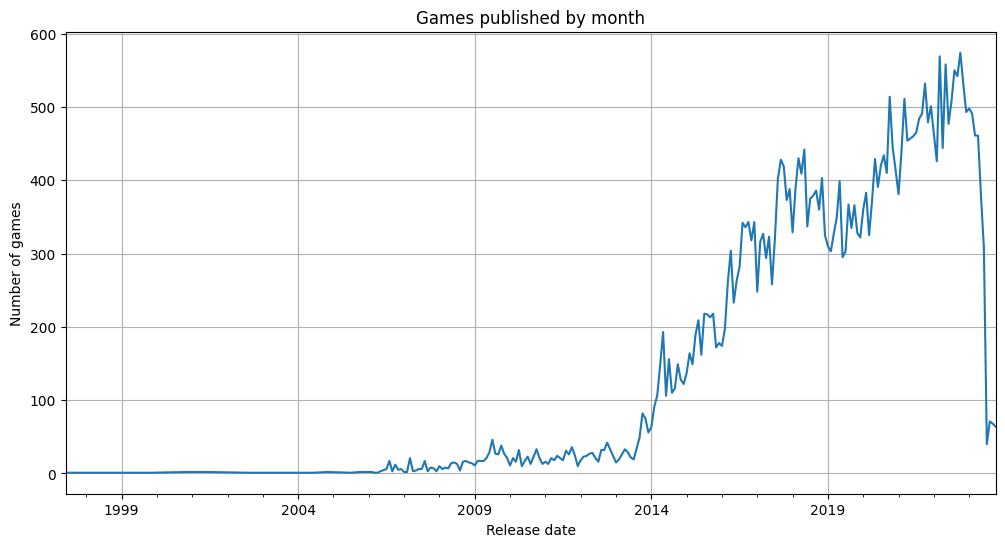

In [7]:
# Number of games published by month
plt.figure(figsize=(12, 6))
df.groupby(df['Release date'].dt.to_period('M')).size().plot(kind='line')
plt.title('Games published by month')
plt.ylabel('Number of games')
plt.grid(True)
plt.show()

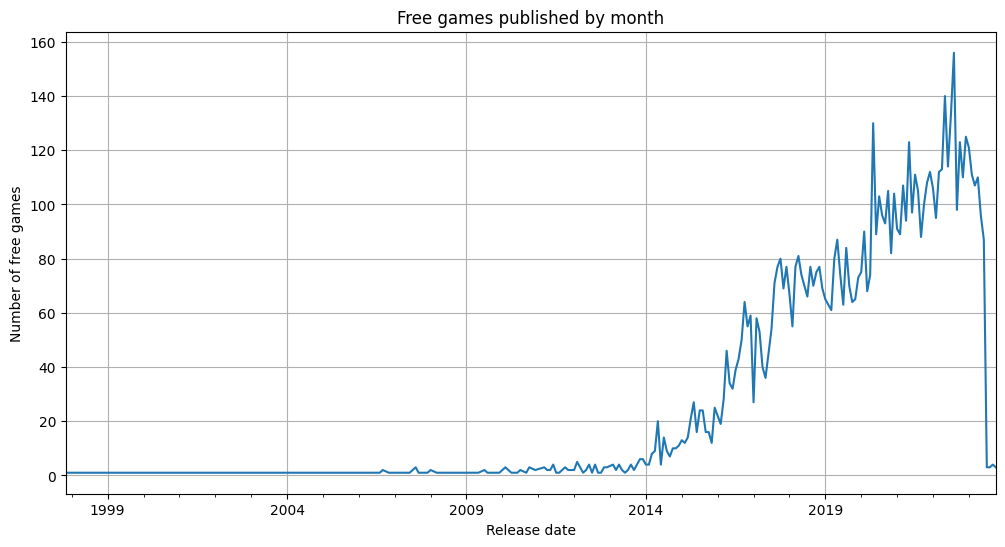

In [8]:
# Number of free games published by month
plt.figure(figsize=(12, 6))
df[df['Price final'] == 0].groupby(df['Release date'].dt.to_period('M')).size().plot(kind='line')
plt.title('Free games published by month')
plt.ylabel('Number of free games')
plt.grid(True)
plt.show()

### Price Final and Price Original EDA

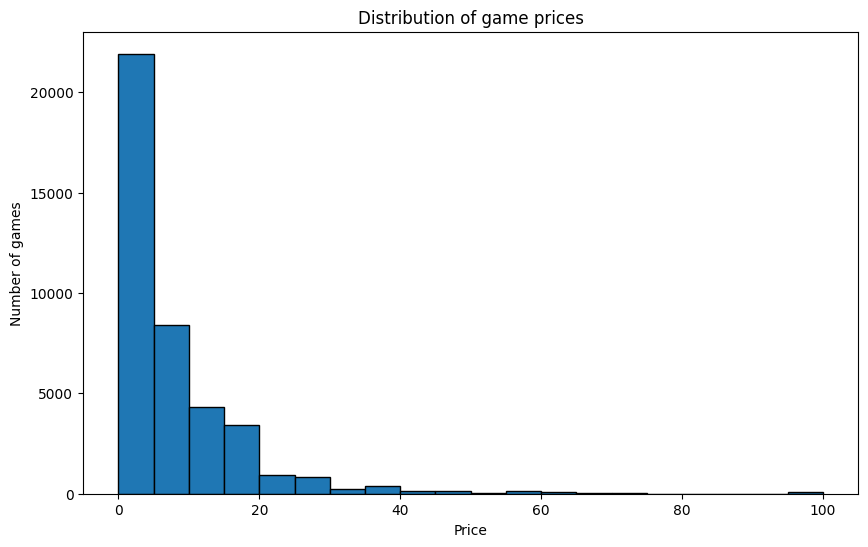

In [8]:
# Prices
bins = range(0, 105, 5)
plt.figure(figsize=(10, 6))
plt.hist(df['Price final'], bins=bins, edgecolor='black')
plt.title('Distribution of game prices')
plt.xlabel('Price')
plt.ylabel('Number of games')
plt.show()

In [9]:
print("Free games: ", df[df['Price final'] == 0].shape[0])
print("Paid games: ", df[df['Price final'] > 0].shape[0])
print("Percentage of free games: ", round(df[df['Price final'] == 0].shape[0] / df.shape[0], 2) * 100)
print("Percentage of paid games: ", round(df[df['Price final'] > 0].shape[0] / df.shape[0], 2) * 100)

Free games:  7748
Paid games:  33422
Percentage of free games:  19.0
Percentage of paid games:  81.0


In [10]:
print("Free games: ", df[df['Price original'] == 0].shape[0])
print("Paid games: ", df[df['Price original'] > 0].shape[0])
print("Percentage of free games: ", round(df[df['Price original'] == 0].shape[0] / df.shape[0], 2) * 100)
print("Percentage of paid games: ", round(df[df['Price original'] > 0].shape[0] / df.shape[0], 2) * 100)

Free games:  8554
Paid games:  32616
Percentage of free games:  21.0
Percentage of paid games:  79.0


This data seems suspicious since price original have more free games than price final

In [11]:
# maximum price
print(df['Price original'].max())
df[df['Price original'] == df['Price original'].max()]

299.9


,App ID,Name,Required age,DLC count,Detailed description,About the game,Short description,Reviews,Windows,Mac,...,Peak CCU,Tags,Release date,rating,Positive ratio,user_reviews,Price final,Price original,Discount,Steam Deck
2078,253670,Aartform Curvy 3D 3.0,0,0,Curvy 3D 4 Curvy 3D 4 is out now! \\\ Aartform...,Curvy 3D 3.0 is an innovative sculpting progra...,Curvy 3D 3.0 is an innovative sculpting progra...,NaN,True,False,...,0,Animation & Modeling,2013-11-12,Mixed,69,39,299.9,299.9,0.0,True


### DLC Count

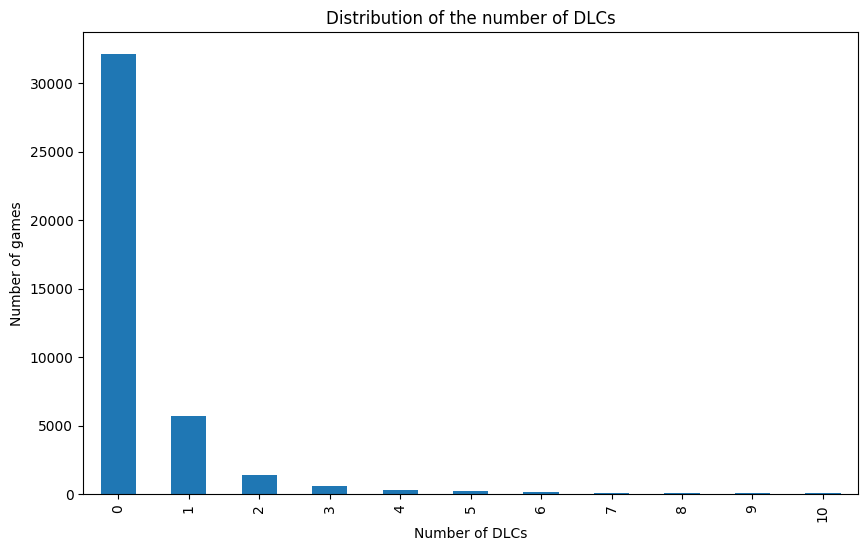

In [12]:
# Number of DLCs (up to 10)
dlc_counts = df['DLC count'].value_counts().sort_index()
dlc_counts = dlc_counts[dlc_counts.index <= 10]
plt.figure(figsize=(10, 6))
dlc_counts.plot(kind='bar')
plt.title('Distribution of the number of DLCs')
plt.xlabel('Number of DLCs')
plt.ylabel('Number of games')
plt.show()

In [13]:
# games with the most DLCs
df[df['DLC count'] == df['DLC count'].max()].head(10)

,App ID,Name,Required age,DLC count,Detailed description,About the game,Short description,Reviews,Windows,Mac,...,Peak CCU,Tags,Release date,rating,Positive ratio,user_reviews,Price final,Price original,Discount,Steam Deck
24933,1196310,Fantasy Grounds Unity,0,2366,Featured DLC / D&amp;D Essentials D&amp;D Adve...,Prep Less. Play Better. Fantasy Grounds is kno...,Prep Less. Play Better. Exciting upgrades awai...,NaN,True,True,...,145,"RPG,Dungeons & Dragons,Strategy,Indie,Software...",2020-11-05,Very Positive,83,527,30.0,0.0,0.0,True


# ATTEMPT 1

## 1. READ DATA

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/merged_steam_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App ID                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

## 2. FEATURE SELECTION

In [214]:
# Select Relevant Features to be Explored more
selected_tabular = [
    'Release date', 'Required age', 'Price original', 'DLC count', 'Windows',
    'Mac', 'Linux', 'Steam Deck', 'Supported languages', 'Full audio languages',
    'Developers', 'Publishers',
    'Movies', 'rating'
]

selected_text = [
    'Short description', 'Genres', 'Categories', 'Tags', 'Detailed description'
]

selected_atr = selected_tabular + selected_text
selected_atr

['Release date',
 'Required age',
 'Price original',
 'DLC count',
 'Windows',
 'Mac',
 'Linux',
 'Steam Deck',
 'Supported languages',
 'Full audio languages',
 'Developers',
 'Publishers',
 'Movies',
 'rating',
 'Short description',
 'Genres',
 'Categories',
 'Tags',
 'Detailed description']

In [215]:
df = df[selected_atr]
df.head()

,Release date,Required age,Price original,DLC count,Windows,Mac,Linux,Steam Deck,Supported languages,Full audio languages,Developers,Publishers,Movies,rating,Short description,Genres,Categories,Tags,Detailed description
0,2000-11-01,0,9.99,0,True,True,True,True,"English,French,German,Italian,Spanish - Spain,...","English,French,German,Italian,Spanish - Spain,...",Valve,Valve,NaN,Overwhelmingly Positive,Play the world's number 1 online action game. ...,Action,"Multi-player,PvP,Online PvP,Shared/Split Scree...","Action,FPS,Multiplayer,Shooter,Classic,Team-Ba...",Play the world's number 1 online action game. ...
1,1999-04-01,0,4.99,0,True,True,True,True,"English,French,German,Italian,Spanish - Spain,...",NaN,Valve,Valve,NaN,Very Positive,One of the most popular online action games of...,Action,"Multi-player,PvP,Online PvP,Shared/Split Scree...","Action,FPS,Multiplayer,Classic,Hero Shooter,Sh...",One of the most popular online action games of...
2,2003-05-01,0,4.99,0,True,True,True,True,"English,French,German,Italian,Spanish - Spain",NaN,Valve,Valve,NaN,Very Positive,Enlist in an intense brand of Axis vs. Allied ...,Action,"Multi-player,Valve Anti-Cheat enabled","FPS,World War II,Multiplayer,Shooter,Action,Wa...",Enlist in an intense brand of Axis vs. Allied ...
3,2001-06-01,0,4.99,0,True,True,True,True,"English,French,German,Italian,Spanish - Spain,...",NaN,Valve,Valve,NaN,Mostly Positive,Enjoy fast-paced multiplayer gaming with Death...,Action,"Multi-player,PvP,Online PvP,Shared/Split Scree...","Action,FPS,Classic,Multiplayer,Shooter,First-P...",Enjoy fast-paced multiplayer gaming with Death...
4,1999-11-01,0,4.99,0,True,True,True,True,"English,French,German,Korean",NaN,Gearbox Software,Valve,NaN,Overwhelmingly Positive,Return to the Black Mesa Research Facility as ...,Action,"Single-player,Multi-player,Valve Anti-Cheat en...","FPS,Action,Classic,Sci-fi,Singleplayer,Shooter...",Return to the Black Mesa Research Facility as ...


In [216]:
df.rename(columns={
    'Price original': 'Price'
}, inplace=True)

## 3. EDA

### 3a. Missing Values Identification

In [24]:
# Get missing value amount and percentage for each column and sort Descending
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values = pd.DataFrame(missing_values)
missing_values.columns = ['Missing Values']
missing_values['Percentage'] = (missing_values['Missing Values'] / df.shape[0]) * 100
missing_values = missing_values.sort_values(by='Missing Values', ascending=False)
missing_values

,Missing Values,Percentage
Full audio languages,21882,53.150352
Tags,3690,8.962837
Movies,1804,4.381831
Categories,527,1.280058
Publishers,208,0.505222
Developers,74,0.179743
Detailed description,47,0.114161
Genres,44,0.106874
Short description,14,0.034005
Supported languages,13,0.031576


#### Exploring Full Audio Languages

In [25]:
df[df['Full audio languages'].notnull()]['Full audio languages']

0        English,French,German,Italian,Spanish - Spain,...
6        English,French,German,Italian,Spanish - Spain,...
9        English,French,German,Italian,Korean,Spanish -...
16       English,French,German,Italian,Korean,Spanish -...
17       English,French,German,Russian,Spanish - Spain,...
                               ...                        
41158                                              English
41163                                             Japanese
41167                                              English
41168                                              English
41169                                              English
Name: Full audio languages, Length: 19288, dtype: object

Full audio languages may influence rating of a game since it aligns with people's preferences in playing games. To handle the missing value here, we will make a new column 'Has Full Audio' with value yes/no or 1/0.

#### Explore < 10% Missing value columns

In [26]:
df[df['Tags'].notnull()]['Tags']

0        Action,FPS,Multiplayer,Shooter,Classic,Team-Ba...
1        Action,FPS,Multiplayer,Classic,Hero Shooter,Sh...
2        FPS,World War II,Multiplayer,Shooter,Action,Wa...
3        Action,FPS,Classic,Multiplayer,Shooter,First-P...
4        FPS,Action,Classic,Sci-fi,Singleplayer,Shooter...
                               ...                        
41165    Early Access,CRPG,Dungeon Crawler,Exploration,...
41166    Old School,Time Management,Education,Open Worl...
41167    Hunting,Horror,Dark Humor,Nature,Exploration,A...
41168    3D Platformer,Action-Adventure,Comedy,Action,A...
41169    Simulation,Hidden Object,Horror,Puzzle,Realist...
Name: Tags, Length: 37480, dtype: object

Tags' missing values can just be removed/dropped, but this approach can't be mixed with dropping rows in other columns that has missing values < 10% too. So lets just see the others result and decide in the last part of this section.

In [27]:
df[df['Genres'].notnull()]['Genres']

0                                       Action
1                                       Action
2                                       Action
3                                       Action
4                                       Action
                         ...                  
41165                  Action,RPG,Early Access
41166    Action,Adventure,Indie,RPG,Simulation
41167                                   Action
41168                         Action,Adventure
41169                               Simulation
Name: Genres, Length: 41126, dtype: object

Same like Tags, but more valuable

In [28]:
df[df['Movies'].notnull()]['Movies']

9        http://cdn.akamai.steamstatic.com/steam/apps/9...
16       http://cdn.akamai.steamstatic.com/steam/apps/9...
17       http://cdn.akamai.steamstatic.com/steam/apps/9...
19       http://cdn.akamai.steamstatic.com/steam/apps/2...
20       http://cdn.akamai.steamstatic.com/steam/apps/5...
                               ...                        
41165    http://cdn.akamai.steamstatic.com/steam/apps/2...
41166    http://cdn.akamai.steamstatic.com/steam/apps/2...
41167    http://cdn.akamai.steamstatic.com/steam/apps/2...
41168    http://cdn.akamai.steamstatic.com/steam/apps/2...
41169    http://cdn.akamai.steamstatic.com/steam/apps/2...
Name: Movies, Length: 39366, dtype: object

- We can assume that a movie of a game can influence the game's rating. Someone may give bad rating if the game is not the same as presented in the movie.
- Others assumption is that game who has movie reflects the seriousness of the developer and publisher in developing and selling it which may increase the rating

In [29]:
df[df['Categories'].notnull()]['Categories']

0        Multi-player,PvP,Online PvP,Shared/Split Scree...
1        Multi-player,PvP,Online PvP,Shared/Split Scree...
2                    Multi-player,Valve Anti-Cheat enabled
3        Multi-player,PvP,Online PvP,Shared/Split Scree...
4        Single-player,Multi-player,Valve Anti-Cheat en...
                               ...                        
41165    Single-player,Partial Controller Support,Steam...
41166    Single-player,Multi-player,PvP,Shared/Split Sc...
41167    Single-player,Steam Achievements,Full controll...
41168    Single-player,Steam Achievements,Full controll...
41169                     Single-player,Steam Achievements
Name: Categories, Length: 40643, dtype: object

The same as Tags and genres

In [ ]:
df[df['Supported languages'].notnull()]['Supported languages']

0        English,French,German,Italian,Spanish - Spain,...
1        English,French,German,Italian,Spanish - Spain,...
2            English,French,German,Italian,Spanish - Spain
3        English,French,German,Italian,Spanish - Spain,...
4                             English,French,German,Korean
                               ...                        
41165                                              English
41166                                              English
41167                                              English
41168                                              English
41169                                              English
Name: Supported languages, Length: 41157, dtype: object

We can just drop it since imputation would be hard for this column

#### CONCLUSION

Drop missing rows of:
- Supported languages
- Tags
- Categories
- Detail description
- Genres
- Short description

Convert into binary columns:
- Full audio languages => Has/Not has
- Movies => Has/Not has

Impute with Unknown:
- Publishers
- Developers

### 3b. Noise Identification

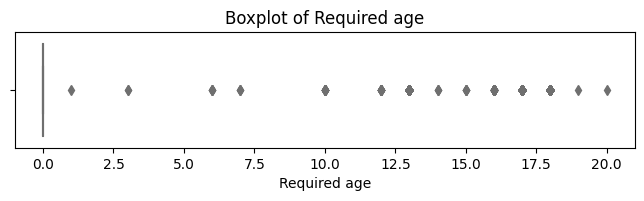

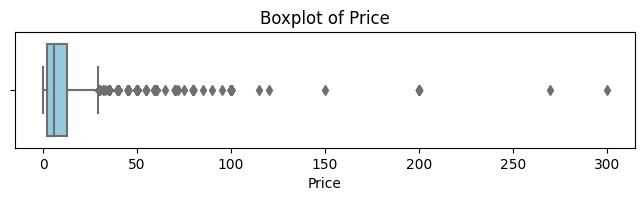

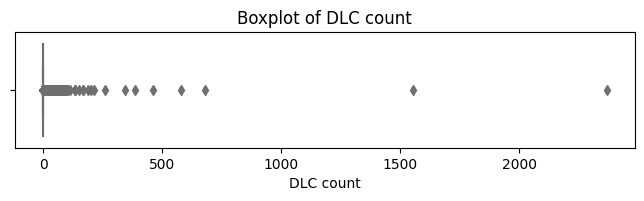

In [67]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.show()

In [68]:
# Use IQR
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    print(f"{col}: {outliers.count()} outliers ({100 * outliers.count() / df.shape[0]:.2f}%)")

Required age: 1106 outliers (2.99%)
Price: 1801 outliers (4.87%)
DLC count: 8541 outliers (23.12%)


#### Exploring Required Age

In [ ]:
# Required age unique values
df['Required age'].unique()

array([ 0, 17, 13, 18, 16, 15,  6, 12, 10, 14,  1,  7,  3, 20, 19],
      dtype=int64)

In [60]:
# Count based on required age
df['Required age'].value_counts()

0     35838
17      708
13      151
18      146
16       52
10       15
12       14
15        5
6         4
14        3
7         3
3         2
1         1
20        1
19        1
Name: Required age, dtype: int64

It can just be dropped or categorized (discretization) to < 17 and > 17 or based on the game age requirement chart. 

#### Exploring Price (Original)

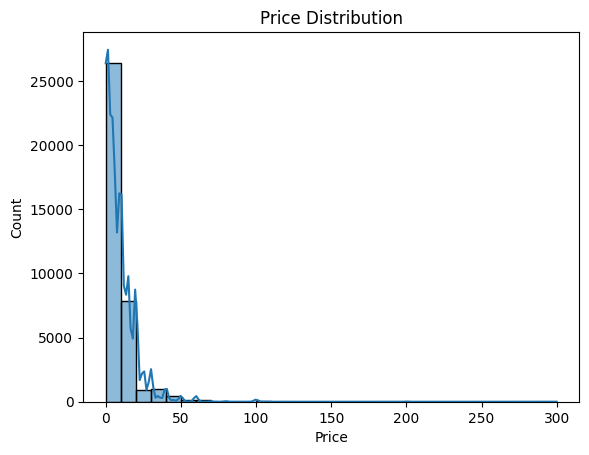

In [69]:
# Price distribution with density plot
sns.histplot(df['Price'].dropna(), kde=True, bins=30)
plt.title('Price Distribution')
plt.show()

it is right skewed

In [70]:
print(df['Price'].describe())

count    36944.000000
mean         9.086544
std         10.668838
min          0.000000
25%          1.990000
50%          5.990000
75%         12.990000
max        299.900000
Name: Price, dtype: float64


In [71]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df[(df['Price'] < lower) | (df['Price'] > upper)]

,Release date,Required age,Price,DLC count,Windows,Mac,Linux,Steam Deck,Supported languages,Developers,Publishers,rating,Short description,Genres,Categories,Tags,Detailed description,Has full audio,Has movie
77,2013-11-15,0,29.99,7,True,True,True,True,"English,German,Italian,Russian,Simplified Chin...",Egosoft,Egosoft,Mixed,"In the distant future, the X universe faces a ...","Action,Simulation","Single-player,Steam Achievements,Full controll...","Simulation,Space,Sci-fi,Action,Space Sim,Sandb...","In the distant future, the X universe faces a ...",Yes,Yes
128,2006-10-25,0,29.99,0,True,True,False,True,"English,French,German,Italian,Spanish - Spain",Firaxis Games,2K,Very Positive,With over 6 million units sold and unprecedent...,Strategy,"Single-player,Multi-player,Includes level editor","Strategy,Turn-Based Strategy,Turn-Based,4X,His...",With over 6 million units sold and unprecedent...,No,No
136,2006-11-24,0,39.99,0,True,False,False,True,"English,French,German,Italian,Spanish - Spain",SimBin,SimBin,Very Positive,The Official WTCC Game | RACE is the first eve...,Racing,"Single-player,Multi-player","Racing,Automobile Sim,Driving,Simulation",The Official WTCC Game | RACE is the first eve...,No,No
197,2008-04-16,0,29.99,0,True,False,False,True,"English,French,German,Italian,Spanish - Spain,...",Nadeo,Ubisoft,Very Positive,TrackMania is the most entertaining car racing...,Racing,"Single-player,Multi-player,Includes level editor","Racing,Multiplayer,Level Editor,Singleplayer,T...",TrackMania is the most entertaining car racing...,No,No
232,2007-07-24,0,29.99,0,True,True,False,True,"English,French,German,Italian,Spanish - Spain",Firaxis Games,2K,Overwhelmingly Positive,Sid Meier's Civilization IV®: Beyond the Sword...,Strategy,Single-player,"Strategy,Turn-Based Strategy,4X,Turn-Based,His...",Sid Meier's Civilization IV®: Beyond the Sword...,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40934,2023-06-15,0,39.99,1,True,False,False,True,"English,French,Italian,German,Spanish - Spain,...",Ubisoft Montreal,Ubisoft,Mixed,Tom Clancy's Rainbow Six® Extraction is a tact...,Action,"Single-player,Multi-player,Co-op,Online Co-op,...","Action,FPS,Online Co-Op,PvE,Shooter,First-Pers...",Comparative Grid Deluxe Edition United Front B...,Yes,Yes
41032,2023-05-16,0,34.99,0,True,False,False,True,English,galesoozka,galesoozka,Positive,Turbotron is an action puzzle game where you p...,Indie,Single-player,"Dungeon Crawler,Difficult,Puzzle,Rogue-like,2D...",Turbotron is an action puzzle game where you p...,Yes,Yes
41046,2023-05-16,0,34.99,0,True,False,False,True,English,galesoozka,galesoozka,Positive,Bloodgazm - action game where players fight ag...,Indie,Single-player,"Action Roguelike,Bullet Hell,Rogue-lite,Arcade...","Bloodgazm is an intense, fast-paced action are...",Yes,Yes
41065,2023-06-01,0,29.99,0,True,False,False,True,"English,Russian",wow wow Games,wow wow Games,Positive,"In Tutenstone, you play as an adventurer who h...",Casual,Single-player,"Casual,Exploration,Cute,3D,Arcade,Sandbox,Dung...","In Tutenstone, you play as an adventurer who h...",No,Yes


In [72]:
df['Price'].sort_values(ascending=True)

41169      0.00
4624       0.00
10607      0.00
4622       0.00
31049      0.00
          ...  
19913    199.99
36909    199.99
39030    199.99
9157     269.99
2078     299.90
Name: Price, Length: 36944, dtype: float64

In [73]:
# see > 75% prices
Q3 = df['Price'].quantile(0.75)
df[df['Price'] > Q3].sort_values(by='Price', ascending=False).head(5)

,Release date,Required age,Price,DLC count,Windows,Mac,Linux,Steam Deck,Supported languages,Developers,Publishers,rating,Short description,Genres,Categories,Tags,Detailed description,Has full audio,Has movie
2078,2013-11-12,0,299.90,0,True,False,False,True,English,Aartform,Aartform,Mixed,Curvy 3D 3.0 is an innovative sculpting progra...,Animation & Modeling,Single-player,Animation & Modeling,Curvy 3D 4 Curvy 3D 4 is out now! \\\ Aartform...,No,Yes
9157,2018-10-10,0,269.99,0,True,True,False,True,English,SideFX,SideFX,Very Positive,Houdini Indie's procedural node-based workflow...,"Animation & Modeling,Design & Illustration,Vid...","Partial Controller Support,Steam Cloud","Animation & Modeling,Game Development,3D,Desig...",As an indie game dev you are faced with the ch...,No,Yes
39030,2022-09-28,0,199.99,0,True,False,False,True,English,"Atomic Fabrik,Cristian Manolachi","Atomic Fabrik,Cristian Manolachi",Positive,The castle is in danger.! Enemies from neighbo...,"Adventure,Casual,Indie,Simulation,Strategy","Single-player,Partial Controller Support,Remot...","Strategy,Adventure,Casual,Simulation,Singlepla...","Attention, Attention!!! The castle is in dange...",No,Yes
37539,2022-05-21,0,199.99,0,True,False,False,True,English,"Cristian Manolachi,Atomic Fabrik","Cristian Manolachi,Atomic Fabrik",Mixed,The School Bus Driver Simulator game offers yo...,"Casual,Indie,Racing,Simulation",Single-player,"Casual,Simulation,Racing,Automobile Sim,Explor...","Such a simple job, but with a very big respons...",No,Yes
19913,2018-12-03,0,199.99,0,True,True,False,True,English,JEPR DEV,JEPR DEV,Mixed,DO NOT BUY... A massive Space Station was foun...,"Action,Indie,Early Access",Single-player,"Action,Indie,Early Access,FPS","NOTE: DO NOT BUY THE GAME, READ LATEST UPDATE ...",Yes,No


After exploring the Price feature, it turns out that the "games" with high prices are mostly actually software for editing/producing—things like game development tools, animation, 3D illustration, web publishing, etc.—which aren’t relevant to our context, as we want to build a model to predict Steam game ratings, not Steam applications.
So, to handle extreme values in the price, we’d suggest sticking with one of these two options:
1. Remove all entries that are not actual games
2. Drop all rows where the price is an outlier, since price outliers aren’t that many—less than 10%

#### Explore DLC Count

In [74]:
df['DLC count'].describe()

count    36944.000000
mean         0.879981
std         16.448427
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2366.000000
Name: DLC count, dtype: float64

In [75]:
df['DLC count'].value_counts()

0      28403
1       5358
2       1351
3        525
4        301
       ...  
45         1
87         1
168        1
71         1
90         1
Name: DLC count, Length: 90, dtype: int64

We can't dropped it since the noise are quite a lot and it can remove any valuable information. So we'll just make a new column 'Has DLC' that contains yes/no or 1/0

### 3c. Duplicates : No duplicates

In [91]:
# Check for duplicates
df.duplicated().sum()

0

### 3d. Univariate Analysis

In [99]:
# Count unique values per column
unique_counts = df.nunique()

# Columns with more than 5 unique values
less_than_5 = unique_counts[unique_counts < 5]

# Columns with more than 10 unique values
between_5_10 = unique_counts[(unique_counts >= 5) & (unique_counts <= 10)]

# Columns with more than 10 unique values
more_than_10 = unique_counts[unique_counts > 10]

# Display results
print("Columns with less than 5 unique values:")
print(less_than_5)

print("\nColumns between 5 and 10 unique values:")
print(between_5_10)

print("\nColumns with more than 10 unique values:")
print(more_than_10)

Columns with less than 5 unique values:
Windows       2
Mac           2
Linux         2
Steam Deck    1
dtype: int64

Columns between 5 and 10 unique values:
rating    9
dtype: int64

Columns with more than 10 unique values:
Release date             4151
Required age               15
Price                     160
DLC count                  91
Supported languages      8325
Full audio languages     1657
Developers              25493
Publishers              20688
Movies                  39362
Short description       40911
Genres                   1823
Categories               4513
Tags                    35052
Detailed description    41060
dtype: int64


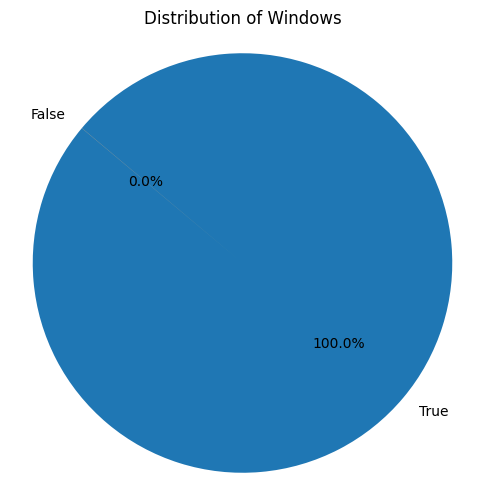

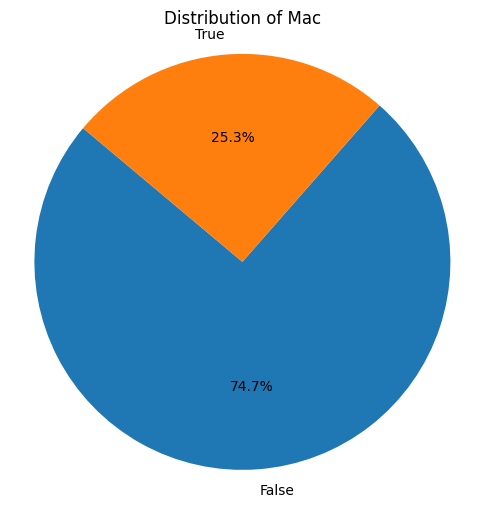

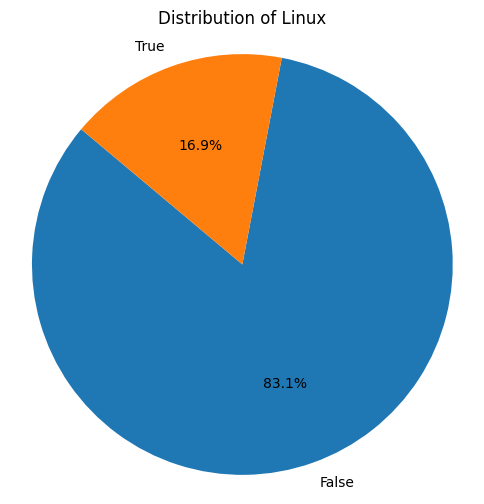

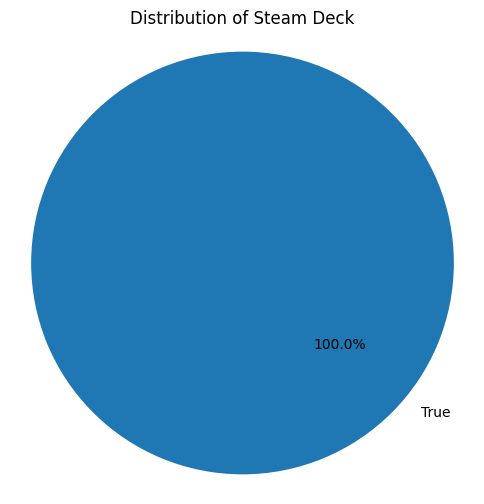

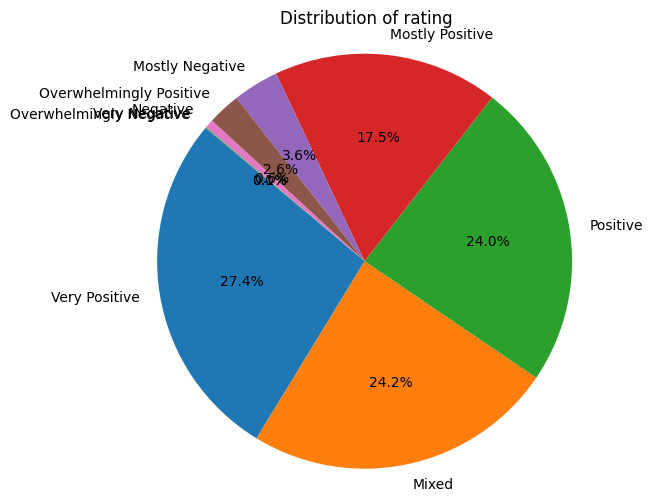

In [100]:
# Loop through and create pie chart for each
for col in df.columns:
    # Only proceed if unique values are not too many (for readability)
    if df[col].nunique() <= 10:
        value_counts = df[col].value_counts().head(10)
        plt.figure(figsize=(6, 6))
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
        plt.title(f"Distribution of {col}")
        plt.axis('equal')
        plt.show()

Windows and steam deck are 100%, they should be dropped because they have no predictive power

In [101]:
# Count of free and paid games
free_paid_counts = df['Price'].apply(lambda x: 'Free' if x == 0 else 'Paid').value_counts()

print(free_paid_counts)

Paid    32616
Free     8554
Name: Price, dtype: int64


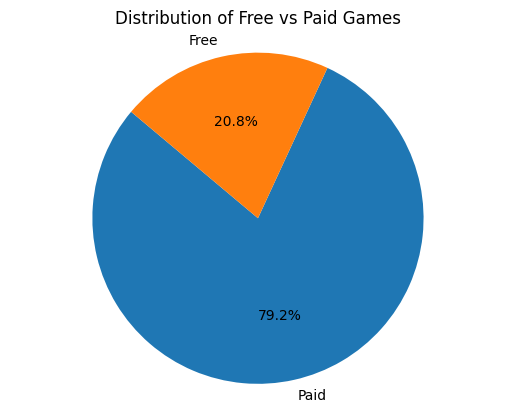

In [102]:
free_paid_counts.plot(kind='pie', autopct='%1.1f%%', labels=free_paid_counts.index, startangle=140)
plt.title('Distribution of Free vs Paid Games')
plt.ylabel('')
plt.axis('equal')
plt.show()

In [103]:
df['Supported languages'].value_counts()

English                                                                                                                                                                                                18892
English,Russian                                                                                                                                                                                         1355
Simplified Chinese                                                                                                                                                                                       926
English,Simplified Chinese                                                                                                                                                                               687
English,Japanese                                                                                                                                                                    

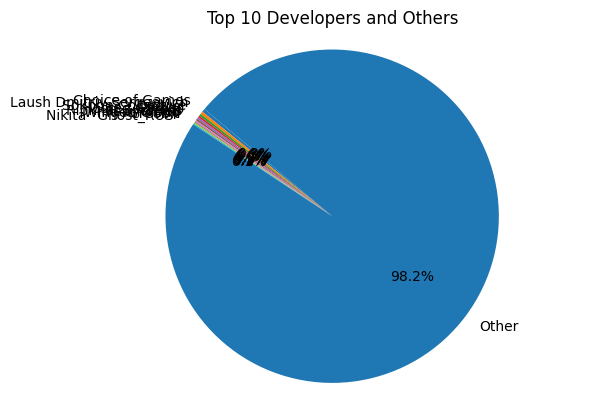

In [144]:
# Show top 10 most frequent developers and the rest as "Other" in pie chart
top_developers = df['Developers'].value_counts().head(10)
other_count = df['Developers'].value_counts().sum() - top_developers.sum()
top_developers = top_developers.append(pd.Series({'Other': other_count}))
top_developers.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Developers and Others')
plt.ylabel('')
plt.axis('equal')
plt.show()

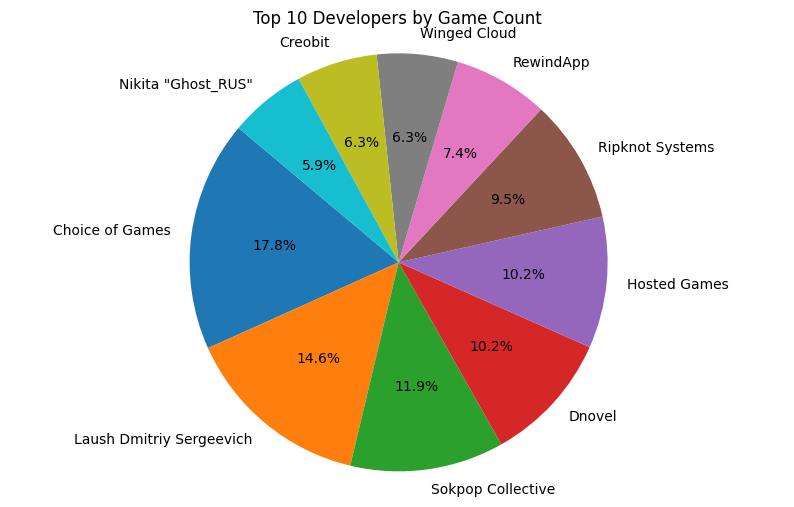

In [145]:
# Show top 10 most frequent developers as pie chart
top_developers = df['Developers'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_developers.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Developers by Game Count')
plt.ylabel('')
plt.axis('equal')
plt.show()

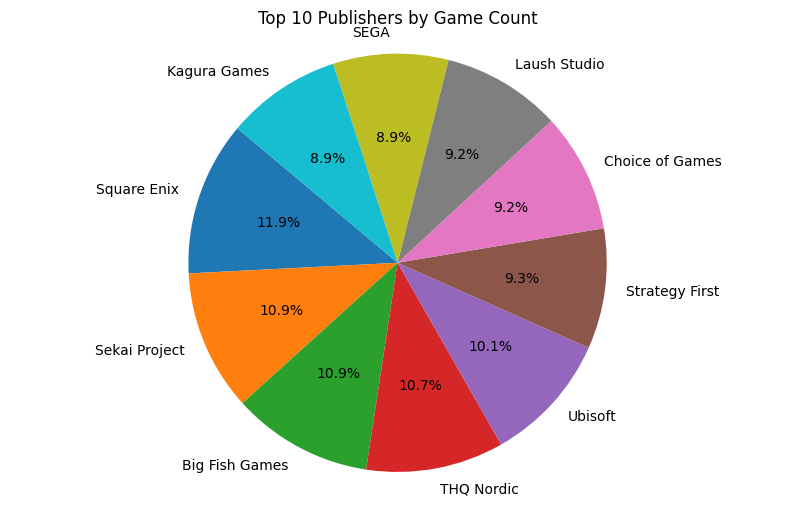

In [106]:
# Show top 10 most frequent publishers using pie chart
top_publishers = df['Publishers'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_publishers.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Publishers by Game Count')
plt.ylabel('')
plt.axis('equal')
plt.show()

## 4. PREPROCESSING

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

### 4a. Data Cleaning

#### Missing Values Handling

In [217]:
# Drop rows
critical_cols = ['Tags', 'Supported languages', 'Categories', 'Detailed description', 'Genres', 'Short description']
df.dropna(subset=critical_cols, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36944 entries, 0 to 41169
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          36944 non-null  object 
 1   Required age          36944 non-null  int64  
 2   Price                 36944 non-null  float64
 3   DLC count             36944 non-null  int64  
 4   Windows               36944 non-null  bool   
 5   Mac                   36944 non-null  bool   
 6   Linux                 36944 non-null  bool   
 7   Steam Deck            36944 non-null  bool   
 8   Supported languages   36944 non-null  object 
 9   Full audio languages  17449 non-null  object 
 10  Developers            36944 non-null  object 
 11  Publishers            36779 non-null  object 
 12  Movies                35268 non-null  object 
 13  rating                36944 non-null  object 
 14  Short description     36944 non-null  object 
 15  Genres             

In [218]:
# Fill Publishers and Developers with unknown
df['Publishers'] = df['Publishers'].fillna('Unknown')
df['Developers'] = df['Developers'].fillna('Unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36944 entries, 0 to 41169
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          36944 non-null  object 
 1   Required age          36944 non-null  int64  
 2   Price                 36944 non-null  float64
 3   DLC count             36944 non-null  int64  
 4   Windows               36944 non-null  bool   
 5   Mac                   36944 non-null  bool   
 6   Linux                 36944 non-null  bool   
 7   Steam Deck            36944 non-null  bool   
 8   Supported languages   36944 non-null  object 
 9   Full audio languages  17449 non-null  object 
 10  Developers            36944 non-null  object 
 11  Publishers            36944 non-null  object 
 12  Movies                35268 non-null  object 
 13  rating                36944 non-null  object 
 14  Short description     36944 non-null  object 
 15  Genres             

#### Noise Handling

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36944 entries, 0 to 41169
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          36944 non-null  object 
 1   Required age          36944 non-null  int64  
 2   Price                 36944 non-null  float64
 3   DLC count             36944 non-null  int64  
 4   Windows               36944 non-null  bool   
 5   Mac                   36944 non-null  bool   
 6   Linux                 36944 non-null  bool   
 7   Steam Deck            36944 non-null  bool   
 8   Supported languages   36944 non-null  object 
 9   Full audio languages  17449 non-null  object 
 10  Developers            36944 non-null  object 
 11  Publishers            36944 non-null  object 
 12  Movies                35268 non-null  object 
 13  rating                36944 non-null  object 
 14  Short description     36944 non-null  object 
 15  Genres             

##### Bin required age into 3 categories

In [220]:
def age_category(age):
    if age <= 12:
        return 'Everyone'
    elif 13 <= age <= 17:
        return 'Teen'
    else:
        return 'Adult'

df['Required age category'] = df['Required age'].apply(age_category)
df.drop(columns=['Required age'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36944 entries, 0 to 41169
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           36944 non-null  object 
 1   Price                  36944 non-null  float64
 2   DLC count              36944 non-null  int64  
 3   Windows                36944 non-null  bool   
 4   Mac                    36944 non-null  bool   
 5   Linux                  36944 non-null  bool   
 6   Steam Deck             36944 non-null  bool   
 7   Supported languages    36944 non-null  object 
 8   Full audio languages   17449 non-null  object 
 9   Developers             36944 non-null  object 
 10  Publishers             36944 non-null  object 
 11  Movies                 35268 non-null  object 
 12  rating                 36944 non-null  object 
 13  Short description      36944 non-null  object 
 14  Genres                 36944 non-null  object 
 15  Ca

In [221]:
df['Required age category'].value_counts()

Everyone    35877
Teen          919
Adult         148
Name: Required age category, dtype: int64

##### Remove outliers in price using IQR

In [222]:
q1 = df['Price'].quantile(.25)
q3 = df['Price'].quantile(.75)
iqr = q3-q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df['Price'] < lower) | (df['Price'] > upper)]
print(outliers.shape)
df = df[(df['Price'] >= lower) & (df['Price'] <= upper)]
print(df.info())

(1801, 19)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 35143 entries, 0 to 41169
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           35143 non-null  object 
 1   Price                  35143 non-null  float64
 2   DLC count              35143 non-null  int64  
 3   Windows                35143 non-null  bool   
 4   Mac                    35143 non-null  bool   
 5   Linux                  35143 non-null  bool   
 6   Steam Deck             35143 non-null  bool   
 7   Supported languages    35143 non-null  object 
 8   Full audio languages   16215 non-null  object 
 9   Developers             35143 non-null  object 
 10  Publishers             35143 non-null  object 
 11  Movies                 33502 non-null  object 
 12  rating                 35143 non-null  object 
 13  Short description      35143 non-null  object 
 14  Genres                 35143 non-null  obje

### 4b. Feature Engineering

##### Binning DLC Count into Has DLC

In [223]:
# Binning DLC count into Has DLC
df['Has DLC'] = np.where(df['DLC count'] > 0, 1, 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35143 entries, 0 to 41169
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           35143 non-null  object 
 1   Price                  35143 non-null  float64
 2   DLC count              35143 non-null  int64  
 3   Windows                35143 non-null  bool   
 4   Mac                    35143 non-null  bool   
 5   Linux                  35143 non-null  bool   
 6   Steam Deck             35143 non-null  bool   
 7   Supported languages    35143 non-null  object 
 8   Full audio languages   16215 non-null  object 
 9   Developers             35143 non-null  object 
 10  Publishers             35143 non-null  object 
 11  Movies                 33502 non-null  object 
 12  rating                 35143 non-null  object 
 13  Short description      35143 non-null  object 
 14  Genres                 35143 non-null  object 
 15  Ca

In [224]:
df['Has DLC'].value_counts()

0    27428
1     7715
Name: Has DLC, dtype: int64

In [225]:
# drop DLC Count
df.drop(columns=['DLC count'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35143 entries, 0 to 41169
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           35143 non-null  object 
 1   Price                  35143 non-null  float64
 2   Windows                35143 non-null  bool   
 3   Mac                    35143 non-null  bool   
 4   Linux                  35143 non-null  bool   
 5   Steam Deck             35143 non-null  bool   
 6   Supported languages    35143 non-null  object 
 7   Full audio languages   16215 non-null  object 
 8   Developers             35143 non-null  object 
 9   Publishers             35143 non-null  object 
 10  Movies                 33502 non-null  object 
 11  rating                 35143 non-null  object 
 12  Short description      35143 non-null  object 
 13  Genres                 35143 non-null  object 
 14  Categories             35143 non-null  object 
 15  Ta

#### Make Has Full Audio and Has Movie feature

In [226]:
# Convert Full audio languages and Movies into binary columns
df['Has full audio'] = df['Full audio languages'].notnull().map({True: 1, False: 0})
df['Has movie'] = df['Movies'].notnull().map({True: 1, False: 0})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35143 entries, 0 to 41169
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           35143 non-null  object 
 1   Price                  35143 non-null  float64
 2   Windows                35143 non-null  bool   
 3   Mac                    35143 non-null  bool   
 4   Linux                  35143 non-null  bool   
 5   Steam Deck             35143 non-null  bool   
 6   Supported languages    35143 non-null  object 
 7   Full audio languages   16215 non-null  object 
 8   Developers             35143 non-null  object 
 9   Publishers             35143 non-null  object 
 10  Movies                 33502 non-null  object 
 11  rating                 35143 non-null  object 
 12  Short description      35143 non-null  object 
 13  Genres                 35143 non-null  object 
 14  Categories             35143 non-null  object 
 15  Ta

In [227]:
# Drop columns: Movies, Full Audio support
df.drop(columns=['Movies', 'Full audio languages'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35143 entries, 0 to 41169
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           35143 non-null  object 
 1   Price                  35143 non-null  float64
 2   Windows                35143 non-null  bool   
 3   Mac                    35143 non-null  bool   
 4   Linux                  35143 non-null  bool   
 5   Steam Deck             35143 non-null  bool   
 6   Supported languages    35143 non-null  object 
 7   Developers             35143 non-null  object 
 8   Publishers             35143 non-null  object 
 9   rating                 35143 non-null  object 
 10  Short description      35143 non-null  object 
 11  Genres                 35143 non-null  object 
 12  Categories             35143 non-null  object 
 13  Tags                   35143 non-null  object 
 14  Detailed description   35143 non-null  object 
 15  Re

#### Make Release Year and Game Age from Release date

In [228]:
# Make Release Year and Game Age from Release date
from datetime import datetime

# Convert to datetime (handle errors gracefully)
df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')

# Drop rows where date conversion failed (optional or handle as missing)
df = df.dropna(subset=['Release date'])

# Extract release year and game age
df['Release Year'] = df['Release date'].dt.year
df['Game Age'] = datetime.now().year - df['Release Year']

# Drop original release date column
df = df.drop(columns=['Release date'])

#### Make Is Free feature from Price

In [229]:
df['IsFree'] = df['Price'].apply(lambda x: 1 if x == 0 else 0)

#### Convert Developers and Publishers into top 10 and others

In [230]:
# Map others to 'small_devs'
df['Developers'] = df['Developers'].apply(
    lambda x: x if x in top_developers else 'small_devs'
)

In [231]:
# Map others to 'small_publishers'
df['Publishers'] = df['Publishers'].apply(
    lambda x: x if x in top_publishers else 'small_publishers'
)

### 4c. Encoding

#### Encode binary to 1 or 0

In [232]:
# Convert Windows, Mac, Linux, Steam Deck to binary
df['Windows'] = df['Windows'].apply(lambda x: 1 if x else 0)
df['Mac'] = df['Mac'].apply(lambda x: 1 if x else 0)
df['Linux'] = df['Linux'].apply(lambda x: 1 if x else 0)
df['Steam Deck'] = df['Steam Deck'].apply(lambda x: 1 if x else 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35143 entries, 0 to 41169
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price                  35143 non-null  float64
 1   Windows                35143 non-null  int64  
 2   Mac                    35143 non-null  int64  
 3   Linux                  35143 non-null  int64  
 4   Steam Deck             35143 non-null  int64  
 5   Supported languages    35143 non-null  object 
 6   Developers             35143 non-null  object 
 7   Publishers             35143 non-null  object 
 8   rating                 35143 non-null  object 
 9   Short description      35143 non-null  object 
 10  Genres                 35143 non-null  object 
 11  Categories             35143 non-null  object 
 12  Tags                   35143 non-null  object 
 13  Detailed description   35143 non-null  object 
 14  Required age category  35143 non-null  object 
 15  Ha

#### Encode Developers and Publishers

In [233]:
le_dev = LabelEncoder()
le_pub = LabelEncoder()

df['Developers'] = le_dev.fit_transform(df['Developers'])
df['Publishers'] = le_pub.fit_transform(df['Publishers'])

#### Encode Target label: rating

In [234]:
le_rating = LabelEncoder()
df['rating'] = le_rating.fit_transform(df['rating'])

### 4d. Feature Selection

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35143 entries, 0 to 41169
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price                  35143 non-null  float64
 1   Windows                35143 non-null  int64  
 2   Mac                    35143 non-null  int64  
 3   Linux                  35143 non-null  int64  
 4   Steam Deck             35143 non-null  int64  
 5   Supported languages    35143 non-null  object 
 6   Developers             35143 non-null  int32  
 7   Publishers             35143 non-null  int32  
 8   rating                 35143 non-null  int32  
 9   Short description      35143 non-null  object 
 10  Genres                 35143 non-null  object 
 11  Categories             35143 non-null  object 
 12  Tags                   35143 non-null  object 
 13  Detailed description   35143 non-null  object 
 14  Required age category  35143 non-null  object 
 15  Ha

In [236]:
drop_cols = [
    'Windows', 'Steam Deck','Required age category',  
    'Supported languages',
    'Short description', 'Genres', 'Categories', 'Tags', 'Detailed description'
]
df = df.drop(columns=drop_cols)

## 5. MODELING

### 5a. Split data

In [237]:
X = df.drop(columns=['rating'])
y = df['rating']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [238]:
X_train

,Price,Mac,Linux,Developers,Publishers,Has DLC,Has full audio,Has movie,Release Year,Game Age,IsFree
11793,1.99,0,0,10,10,0,1,1,2017,8,0
5563,9.99,0,0,10,10,1,0,1,2015,10,0
36018,0.99,0,0,10,10,0,0,1,2022,3,0
26876,9.99,0,0,10,10,0,1,1,2023,2,0
11046,4.99,0,0,10,10,0,0,1,2017,8,0
...,...,...,...,...,...,...,...,...,...,...,...
28608,11.99,0,0,10,10,0,0,1,2021,4,0
14526,12.99,1,0,10,10,0,1,1,2020,5,0
23713,2.99,1,0,8,10,0,0,1,2020,5,0
21144,5.99,0,0,10,10,0,1,1,2019,6,0


### 5b. Model: Logistic Regression

In [239]:
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
import time

# Simulate training progress bar
print("Training Logistic Regression...")
for _ in tqdm(range(1), desc="Fitting Logistic Regression"):
    logreg_model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto')
    logreg_model.fit(X_train, y_train)
    time.sleep(0.2)  # Optional: simulate time delay for better visual feedback

Training Logistic Regression...


Fitting Logistic Regression:   0%|          | 0/1 [00:00<?, ?it/s]c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Fitting Logistic Regression: 100%|██████████| 1/1 [00:13<00:00, 13.34s/it]


In [240]:
from sklearn.metrics import classification_report

# Predict and evaluate
y_pred_logreg = logreg_model.predict(X_test)
print("\n📊 Classification Report: Logistic Regression")
print(classification_report(y_test, y_pred_logreg, target_names=le_rating.classes_))


📊 Classification Report: Logistic Regression
                         precision    recall  f1-score   support

                  Mixed       0.36      0.43      0.39      1716
        Mostly Negative       0.00      0.00      0.00       260
        Mostly Positive       0.00      0.00      0.00      1247
               Negative       0.00      0.00      0.00        47
Overwhelmingly Negative       0.00      0.00      0.00         1
Overwhelmingly Positive       0.00      0.00      0.00       180
               Positive       0.39      0.57      0.46      1651
          Very Negative       0.00      0.00      0.00         6
          Very Positive       0.36      0.48      0.41      1921

               accuracy                           0.37      7029
              macro avg       0.12      0.16      0.14      7029
           weighted avg       0.28      0.37      0.32      7029



c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

### 5c. Model: Decision Tree

In [241]:
from sklearn.tree import DecisionTreeClassifier

# Simulate training progress bar
print("Training Decision Tree...")
for _ in tqdm(range(1), desc="Fitting Decision Tree"):
    tree_model = DecisionTreeClassifier(random_state=42)
    tree_model.fit(X_train, y_train)
    time.sleep(0.2)


Training Decision Tree...


Fitting Decision Tree: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]


In [242]:
# Predict and evaluate
y_pred_tree = tree_model.predict(X_test)
print("\n📊 Classification Report: Decision Tree")
print(classification_report(y_test, y_pred_tree, target_names=le_rating.classes_))



📊 Classification Report: Decision Tree
                         precision    recall  f1-score   support

                  Mixed       0.33      0.51      0.40      1716
        Mostly Negative       0.12      0.02      0.04       260
        Mostly Positive       0.20      0.07      0.11      1247
               Negative       0.00      0.00      0.00        47
Overwhelmingly Negative       0.00      0.00      0.00         1
Overwhelmingly Positive       0.00      0.00      0.00       180
               Positive       0.42      0.49      0.45      1651
          Very Negative       0.00      0.00      0.00         6
          Very Positive       0.39      0.39      0.39      1921

               accuracy                           0.36      7029
              macro avg       0.16      0.16      0.15      7029
           weighted avg       0.33      0.36      0.33      7029



c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

# ATTEMPT 2